## Project Name - **Titanic Dataset**


##### Name - Aman Mulla.
##### Batch - DS2307



# **Project Summary -**


The Titanic Problem revolves around the infamous sinking of the supposedly 'Unsinkable' RMS Titanic in 1912. This project provides a dataset containing information about passengers, including their unique IDs, passenger class (1st, 2nd, or 3rd), survival status (0 for not survived, 1 for survived), names, gender (male or female), age, the number of siblings/spouses and parents/children on board, ticket details, passenger fares, cabin assignments, and the port of embarkation (Cherbourg, Queenstown, or Southampton).

The objective of this project is to predict whether an arbitrary passenger on the Titanic would have survived the disaster, based on the given attributes. This task involves applying machine learning and data analysis techniques to create a predictive model. By examining the relationships between these attributes and survival outcomes, we can gain insights into the factors that influenced a passenger's chances of surviving the tragic sinking.

Ultimately, the project aims to leverage the available data to build a model that can make informed predictions about the likelihood of survival for any passenger. This analysis is not only historically significant but also showcases the power of data science in solving real-world problems and making informed decisions based on historical data.

We have below feature,
1.   **Passenger id:** Unique Id of the passenger
2.   **Pclass:** Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)
3.   **Survived:** Survived (0 = No; 1 = Yes)
4.   **Name:** Name of the passenger
5.   **Sex:** Sex of the passenger (Male, Female)
6.   **Age:** Age of the passenger
7.   **Sibsp:** Number of Siblings/Spouses Aboard
8.   **Parch:** Number of Parents/Children Aboard
9.   **Ticket:** Ticket Number
10.  **Fare:** Passenger Fare (British pound)
11.  **Cabin:** Cabin
12.  **Embarked:** Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)

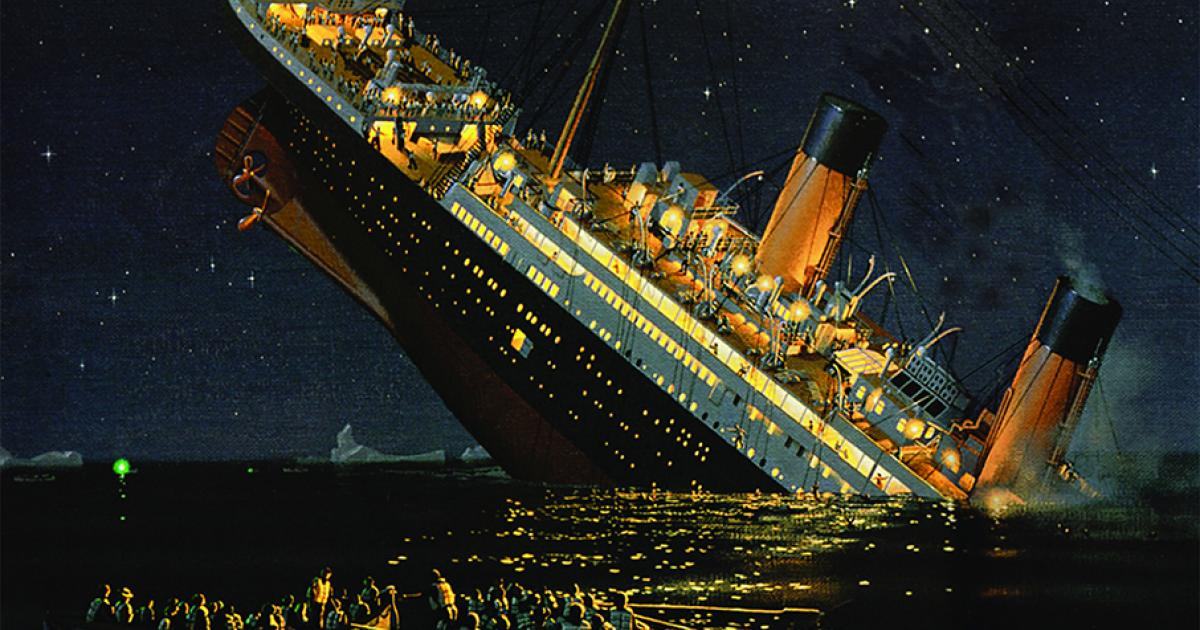

# **Problem Statement**

To develop a predictive model that can determine the likelihood of a passenger's survival in the event of a maritime disaster, such as the sinking of the RMS Titanic in 1912.Understandng a dataset with passenger information, including attributes like class, age, gender, family relationships, ticket details, and embarkation port, the primary goal is to answer the question: "Would an arbitrary passenger survive or not?

This task involves data analysis, feature engineering, and machine learning techniques. By analyzing historical data, we aim to identify patterns and factors that influenced survival. Key challenges include handling missing data, encoding categorical variables, and selecting appropriate algorithms

## Knowing data and variable in dataset

In [ ]:
# Importing Necessary Libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option('display.max_rows', None)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
titanic_data = pd.read_csv('/content/drive/MyDrive/DataSets/titanic_train.csv')


# Checkinh Head of dataset
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
  titanic_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

All columns name are in single words no need to rename for any.

In [ ]:
# Will Check for shape of dataset

titanic_data.shape

(891, 12)

We have total 891 rows and 12 column in our detaset.

**Dataset Information**

In [ ]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


**From .info(), we can observe that we have data with datatype int, float and object. Object datatype need to to encode befor machine learning implimentation as ML algorithms only works on numerical.**

In [ ]:
# Will check for description of dataset

titanic_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


From .describe() we can get count, mean, minimum value, maximum values ans quirtile value for each numerical column.

In [ ]:
titanic_data['Survived'].unique()

titanic_data['Pclass'].unique()

titanic_data['Sex'].unique()

titanic_data['SibSp'].unique()

titanic_data['Parch'].unique()

titanic_data['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

By observing unique values of above variables, we find that above mentioned are categorical varibles in dataset.

**Will Check for Null value in dataset**

In [ ]:
titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<Axes: >

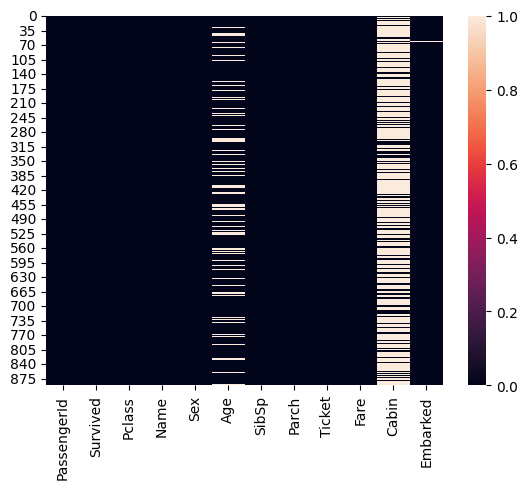

In [ ]:
sns.heatmap(titanic_data.isnull())

**From the information above, it is evident that we have null values in the 'Age', 'Cabin', and 'Embarked' columns. Since this dataset reflects real-world data, we cannot simply fill these null values with arbitrary values like the mean or median. To maintain the authenticity of the dataset, we will fill the NaNs with 0.**

In [ ]:
# So will fill NaNs with 0

titanic_data=titanic_data.fillna(0)

In [ ]:
titanic_data.shape

(891, 12)

#### Chart - 1

### **Survived Count**

0    549
1    342
Name: Survived, dtype: int64


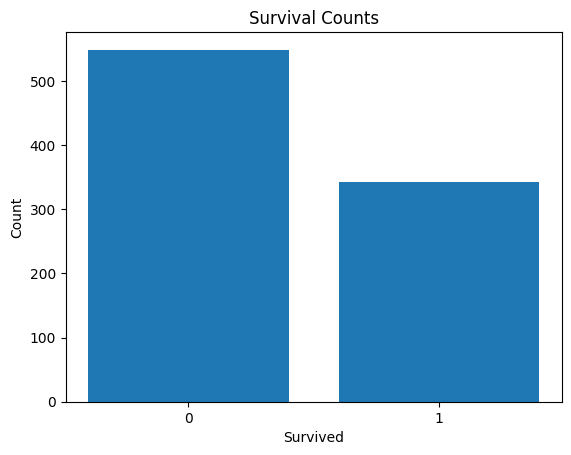

In [ ]:
survived_counts = titanic_data['Survived'].value_counts()

print(survived_counts)

plt.bar(survived_counts.index, survived_counts.values)
plt.xlabel('Survived')
plt.ylabel('Count')
plt.xticks([0, 1], ['0', '1'])  # Survived (0 = No; 1 = Yes)
plt.title('Survival Counts')
plt.show()

**Insights from above chart:**
1. The plot shows that the majority of passengers did not survive the Titanic disaster. This is evident from the significantly higher count of "Did not Survive" (often referred to as 0) compared to "Survived" (often referred to as 1).

#### Chart - 2

### **Class Wise Survived Count**

Survived    0    1
Pclass            
1          80  136
2          97   87
3         372  119


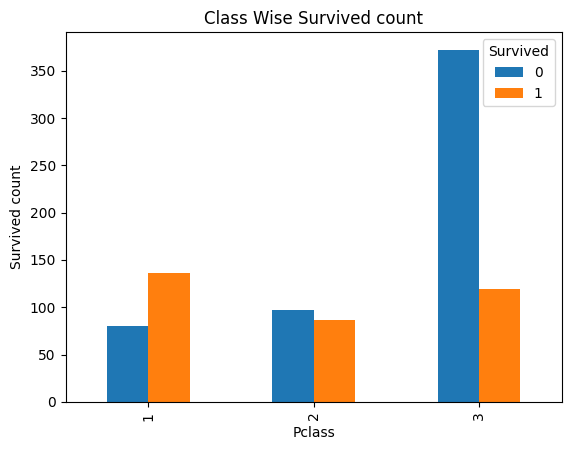

In [ ]:
class_survived = pd.crosstab(index=titanic_data['Pclass'],columns=titanic_data['Survived'])

print(class_survived)  # where pclass = (1 = 1st; 2 = 2nd; 3 = 3rd)

class_survived.plot(kind='bar')
plt.xlabel('Pclass')
plt.ylabel('Survived count')
plt.title('Class Wise Survived count')
plt.legend(title='Survived')
plt.show()

**Insights from above chart:**

1. The bar plot illustrates the distribution of survival outcomes among different passenger classes. It is evident that passengers in the 1st class had a higher survival rate compared to those in the 2nd and 3rd classes.

2. The bar plot shows that the 1st class (Pclass = 1) had the highest number of survivors. This aligns with historical data indicating that passengers in the upper class cabins were given priority during the evacuation.

3. Passengers in the 3rd class (Pclass = 3) had the lowest survival rate. This may indicate that passengers in the lower class cabins had more difficulty accessing lifeboats or were given lower priority during the evacuation.

#### Chart - 3

### **Sex Wise Survived Count**

Survived    0    1
Sex               
female     81  233
male      468  109


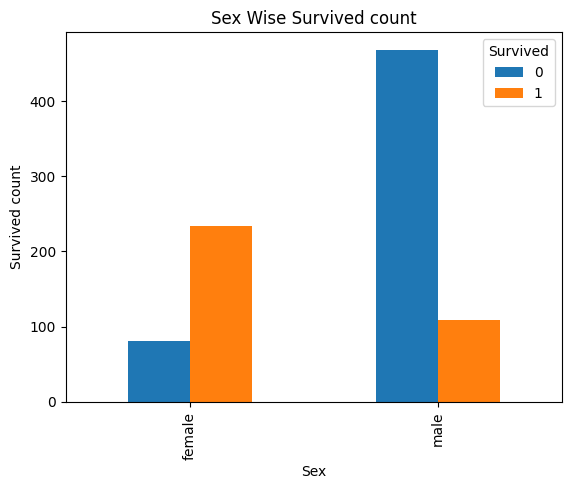

In [ ]:
class_survived = pd.crosstab(index=titanic_data['Sex'],columns=titanic_data['Survived'])

print(class_survived)

class_survived.plot(kind='bar')
plt.xlabel('Sex')
plt.ylabel('Survived count')
plt.title('Sex Wise Survived count')
plt.legend(title='Survived')
plt.show()

**Insights from above chart:**

1. The plot highlights significant disparities in survival between males and females. It's clear that more females survived compared to males.

2. Among the passengers, a higher proportion of females survived, while a lower proportion did not. This aligns with the well-known "women and children first" protocol during disasters, where priority was given to evacuating women and children.

3. This plot suggests that gender could be a significant predictor of survival in any analysis or modeling tasks related to the Titanic dataset. It's a valuable variable to consider when exploring the factors that influenced passenger survival.

#### Chart - 4

### **Age Distribution plot**

Charges mean : 23.79929292929293


<ipython-input-162-5fe9002fdc48>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  dist = sns.distplot(titanic_data['Age'],bins=10)


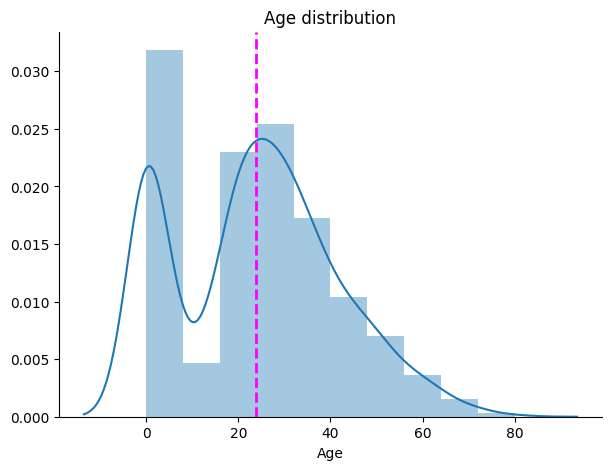

In [ ]:
age_mean = titanic_data['Age'].mean()

print('Charges mean :',age_mean)

f,ax = plt.subplots(figsize=(7,5))
  sns.despine(f)
  dist = sns.distplot(titanic_data['Age'],bins=10)
  dist.set(xlabel = 'Age', ylabel ='', title = 'Age distribution')

  dist.axvline(titanic_data['Age'].mean(), color='magenta', linestyle='dashed', linewidth=2)

  plt.show()

**Insights from above chart:**

1. The plot shows the distribution of passenger ages. It appears that the age distribution is somewhat right-skewed, with more passengers in the younger age groups and fewer in the older age groups.

2. The dashed line represents the mean age, which is an approximate measure of the central tendency of the age distribution. In this case, it seems that the mean age is somewhere around the peak of the distribution.

3. There might be a few outliers on the right side of the distribution, indicating passengers who were significantly older than the average age.

#### Chart - 5

### **Siblings count**

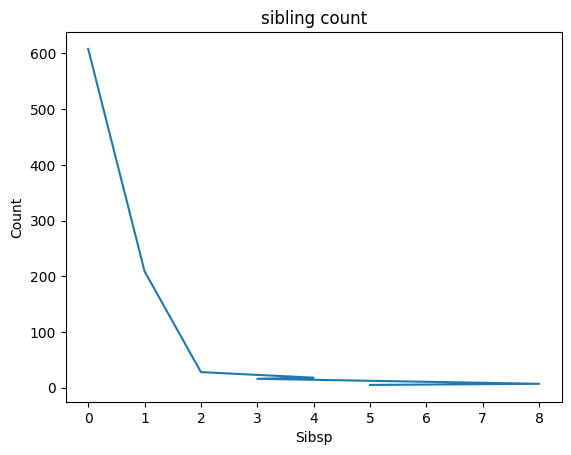

In [ ]:
sibling_count = titanic_data['SibSp'].value_counts()

sibling_count   # Sibsp: Number of Siblings/Spouses Aboard

plt.plot(sibling_count.index, sibling_count.values)
plt.xlabel('Sibsp')
plt.ylabel('Count')
plt.title('sibling count')
plt.show()

**Insights from above chart:**

1. The plot shows that a significant number of passengers (represented by the 'SibSp' value of 0) traveled alone without any siblings or spouses aboard. This is the most common scenario, indicating that a considerable portion of passengers did not have immediate family members with them.

2. A smaller number of passengers had 1 sibling or spouse aboard, indicating that some passengers were traveling with a single family member.

3. The number of passengers traveling with two or more siblings or spouses is considerably smaller. This suggests that passengers with larger families were relatively rare on the Titanic.

#### Chart - 6

### **Siblings count**

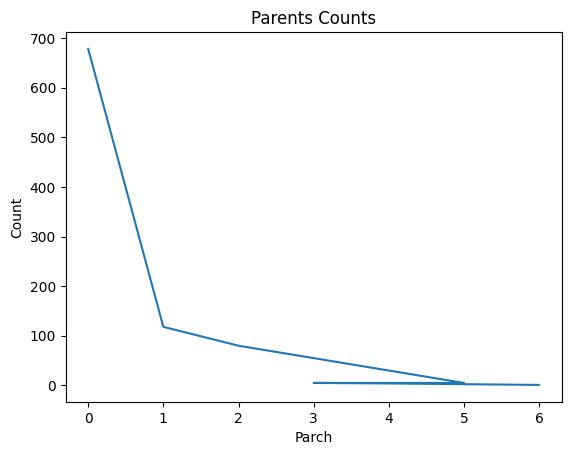

In [ ]:
Parch_count = titanic_data['Parch'].value_counts()

Parch_count   #Parch: Number of Parents/Children Aboard

plt.plot(Parch_count.index, Parch_count.values)
plt.xlabel('Parch')
plt.ylabel('Count')
plt.title('Parents Counts')
plt.show()

**Insights from above chart:**

1. The plot shows that a significant portion of passengers did not have any parents or children with them on board. This is indicated by the high count for 'Parch' equal to 0.

2. There are passengers with parents or children on board, but the counts decrease as the number of parents or children increases. The decreasing trend suggests that the larger families (with more parents or children) were less common.

3. Understanding the distribution of 'Parch' is crucial for analyzing the family size dynamics on the Titanic, which can be essential for studying survival rates, passenger demographics, and other aspects of the disaster.

#### Chart - 7

### **Siblings and parents survived count**

Survived    0    1
SibSp             
0         398  210
1          97  112
2          15   13
3          12    4
4          15    3
5           5    0
8           7    0
Survived    0    1
Parch             
0         445  233
1          53   65
2          40   40
3           2    3
4           4    0
5           4    1
6           1    0


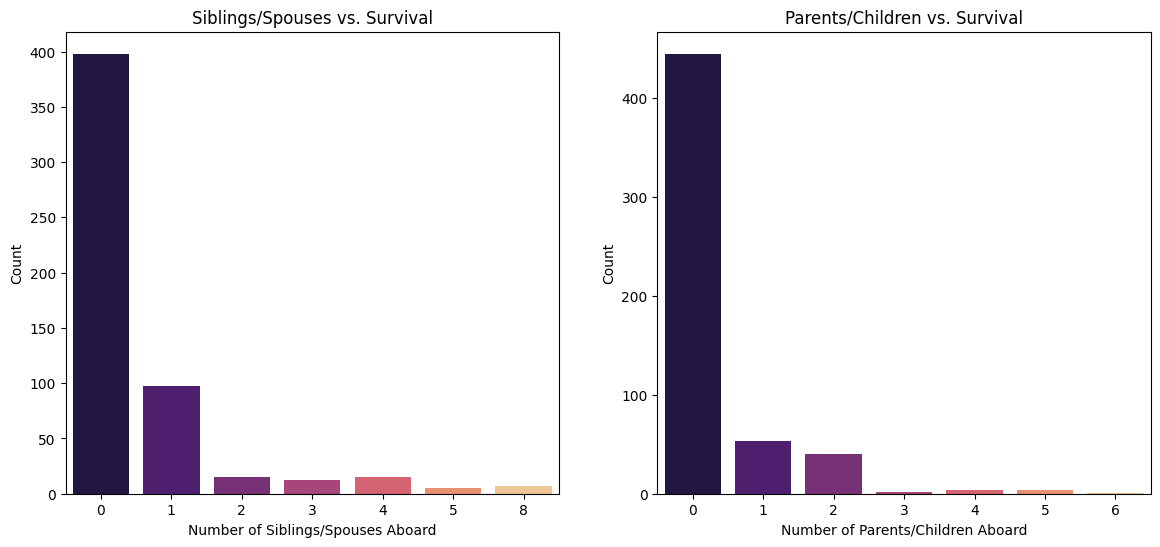

In [ ]:
Siblings_survived = pd.crosstab(index=titanic_data['SibSp'],columns=titanic_data['Survived'])

print(Siblings_survived)

parents_survived = pd.crosstab(index=titanic_data['Parch'],columns=titanic_data['Survived'])

print(parents_survived)

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))

# Plot for Siblings vs. Survived
sns.barplot(x=Siblings_survived.index, y=Siblings_survived[0], ax=axes[0], palette='magma')
axes[0].set_xlabel('Number of Siblings/Spouses Aboard')
axes[0].set_ylabel('Count')
axes[0].set_title('Siblings/Spouses vs. Survival')

# Plot for Parents vs. Survived
sns.barplot(x=parents_survived.index, y=parents_survived[0], ax=axes[1], palette='magma')
axes[1].set_xlabel('Number of Parents/Children Aboard')
axes[1].set_ylabel('Count')
axes[1].set_title('Parents/Children vs. Survival')

plt.show()

**Insights from above chart:**

*   **Siblings/Spouses vs. Survival:**
    1. Passengers with no siblings or spouses aboard (SibSp = 0) constitute the majority, and a significant number of them did not survive.
    2. Passengers with 1 sibling or spouse (SibSp = 1) have a better survival rate compared to those with no siblings/spouses.
    3. The survival rate drops for passengers with more than 1 sibling or spouse, with the lowest survival rate seen for those with 5 or 8 siblings/spouses.
    
*   **Parents/Children vs. Survival:**
    1. Passengers with no parents or children aboard (Parch = 0) make up the majority, and a significant number of them did not survive.
    2. Passengers with 1 or 2 parents/children (Parch = 1 or 2) tend to have a higher survival rate compared to those with none.
    3. The survival rate drops for passengers with more than 2 parents/children, and those with 4 parents/children have the lowest survival rate.

#### Chart - 8

### **Fair and passenger count**

8.0500     43
13.0000    42
7.8958     38
7.7500     34
26.0000    31
10.5000    24
7.9250     18
7.7750     16
7.2292     15
0.0000     15
26.5500    15
7.2500     13
7.8542     13
8.6625     13
7.2250     12
9.5000      9
16.1000     9
24.1500     8
15.5000     8
7.0500      7
Name: Fare, dtype: int64


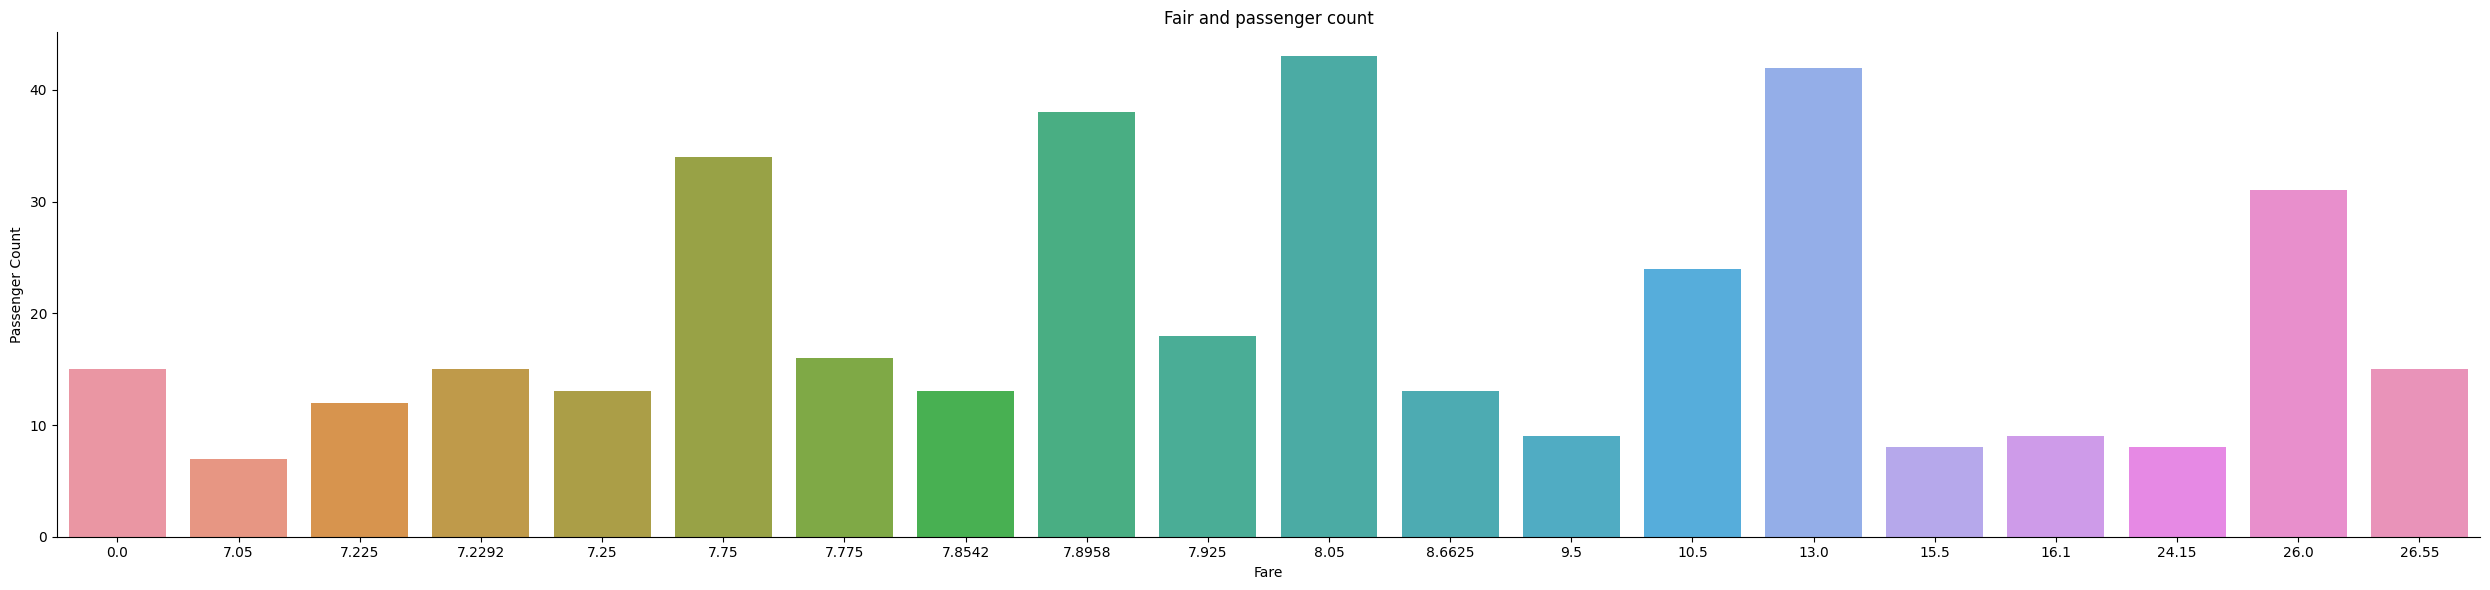

In [ ]:
fair_count = titanic_data['Fare'].value_counts()

sorted_fair_count = fair_count.sort_values(ascending=False).head(20)

print(sorted_fair_count)

f,ax = plt.subplots(figsize=(25,6))
sns.despine(f)
sns.barplot(x=sorted_fair_count.index,y=sorted_fair_count.values,data=titanic_data)
plt.xlabel('Fare')
plt.ylabel('Passenger Count')
plt.title('Fair and passenger count')

plt.tight_layout()
plt.show()

**Insights from above chart:**

1. The plot shows the distribution of fare values paid by passengers. It reveals the most common fare values within the dataset.

2. The top 20 most common fare values are displayed on the x-axis which are 8.05,13.0,7.89 These are the fare values that a significant number of passengers paid.

#### Chart - 9

### **Embarked and passenger count**

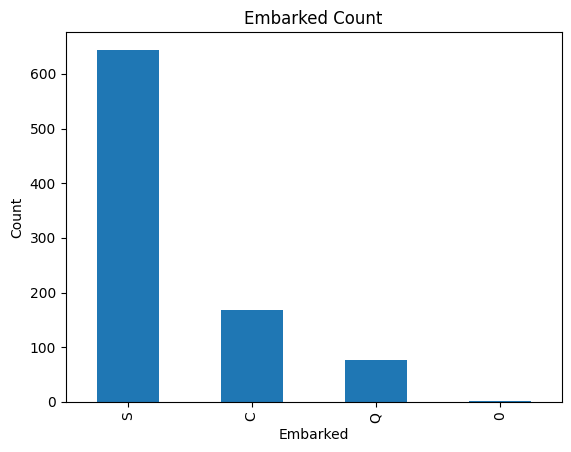

In [ ]:
Embarked_count = titanic_data['Embarked'].value_counts()  # (C = Cherbourg; Q = Queenstown; S = Southampton)

Embarked_count

Embarked_count.plot(kind='bar')
plt.xlabel('Embarked')
plt.ylabel('Count')
plt.title('Embarked Count')
plt.show()

**Insights from above chart:**

1. The plot shows that the majority of passengers on the Titanic embarked from Southampton ('S').This indicates from the significantly higher count of passengers who boarded at this port compared to the other two ports.

2. The counts of passengers who boarded at Cherbourg ('C') and Queenstown ('Q') are noticeably lower in comparison to Southampton. Cherbourg has a higher count than Queenstown, suggesting that more passengers embarked from 'C' than 'Q'.

#### Chart - 10

### **Embarked and Survived count**

Survived    0    1
Embarked          
0           0    2
C          75   93
Q          47   30
S         427  217


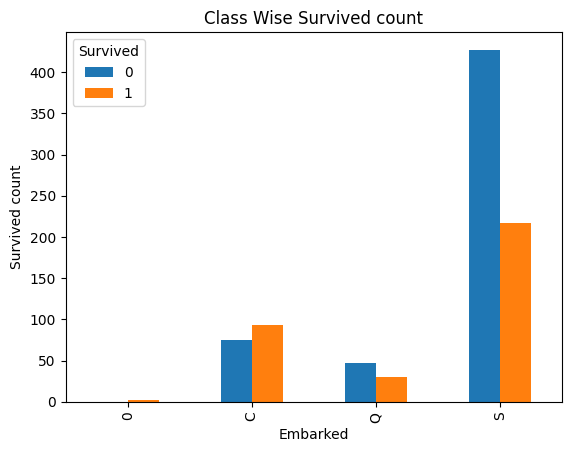

In [ ]:
class_survived = pd.crosstab(index=titanic_data['Embarked'],columns=titanic_data['Survived'])

print(class_survived)  # where pclass = (1 = 1st; 2 = 2nd; 3 = 3rd)  (C = Cherbourg; Q = Queenstown; S = Southampton)

class_survived.plot(kind='bar')
plt.xlabel('Embarked')
plt.ylabel('Survived count')
plt.title('Class Wise Survived count')
plt.legend(title='Survived')
plt.show()

**Insights from above chart:**

1. The plot compares the survival counts of passengers based on their port of embarkation.

2. Passengers who embarked from Cherbourg (C) had a relatively higher survival rate compared to the other two ports. This suggests that there may have been factors associated with the passengers from Cherbourg that contributed to a higher likelihood of survival.

3. Most passengers boarded in Southampton (S), and while the number of survivors is higher, the survival rate appears to be lower than that of Cherbourg. This suggests that Southampton may have had a lower survival rate, potentially due to differences in passenger demographics or boarding locations on the ship.

4. Queenstown (Q) had the lowest number of passengers, and the survival rate seems to be the lowest among the three ports.

#### Chart - 11

### **Pair Plot**

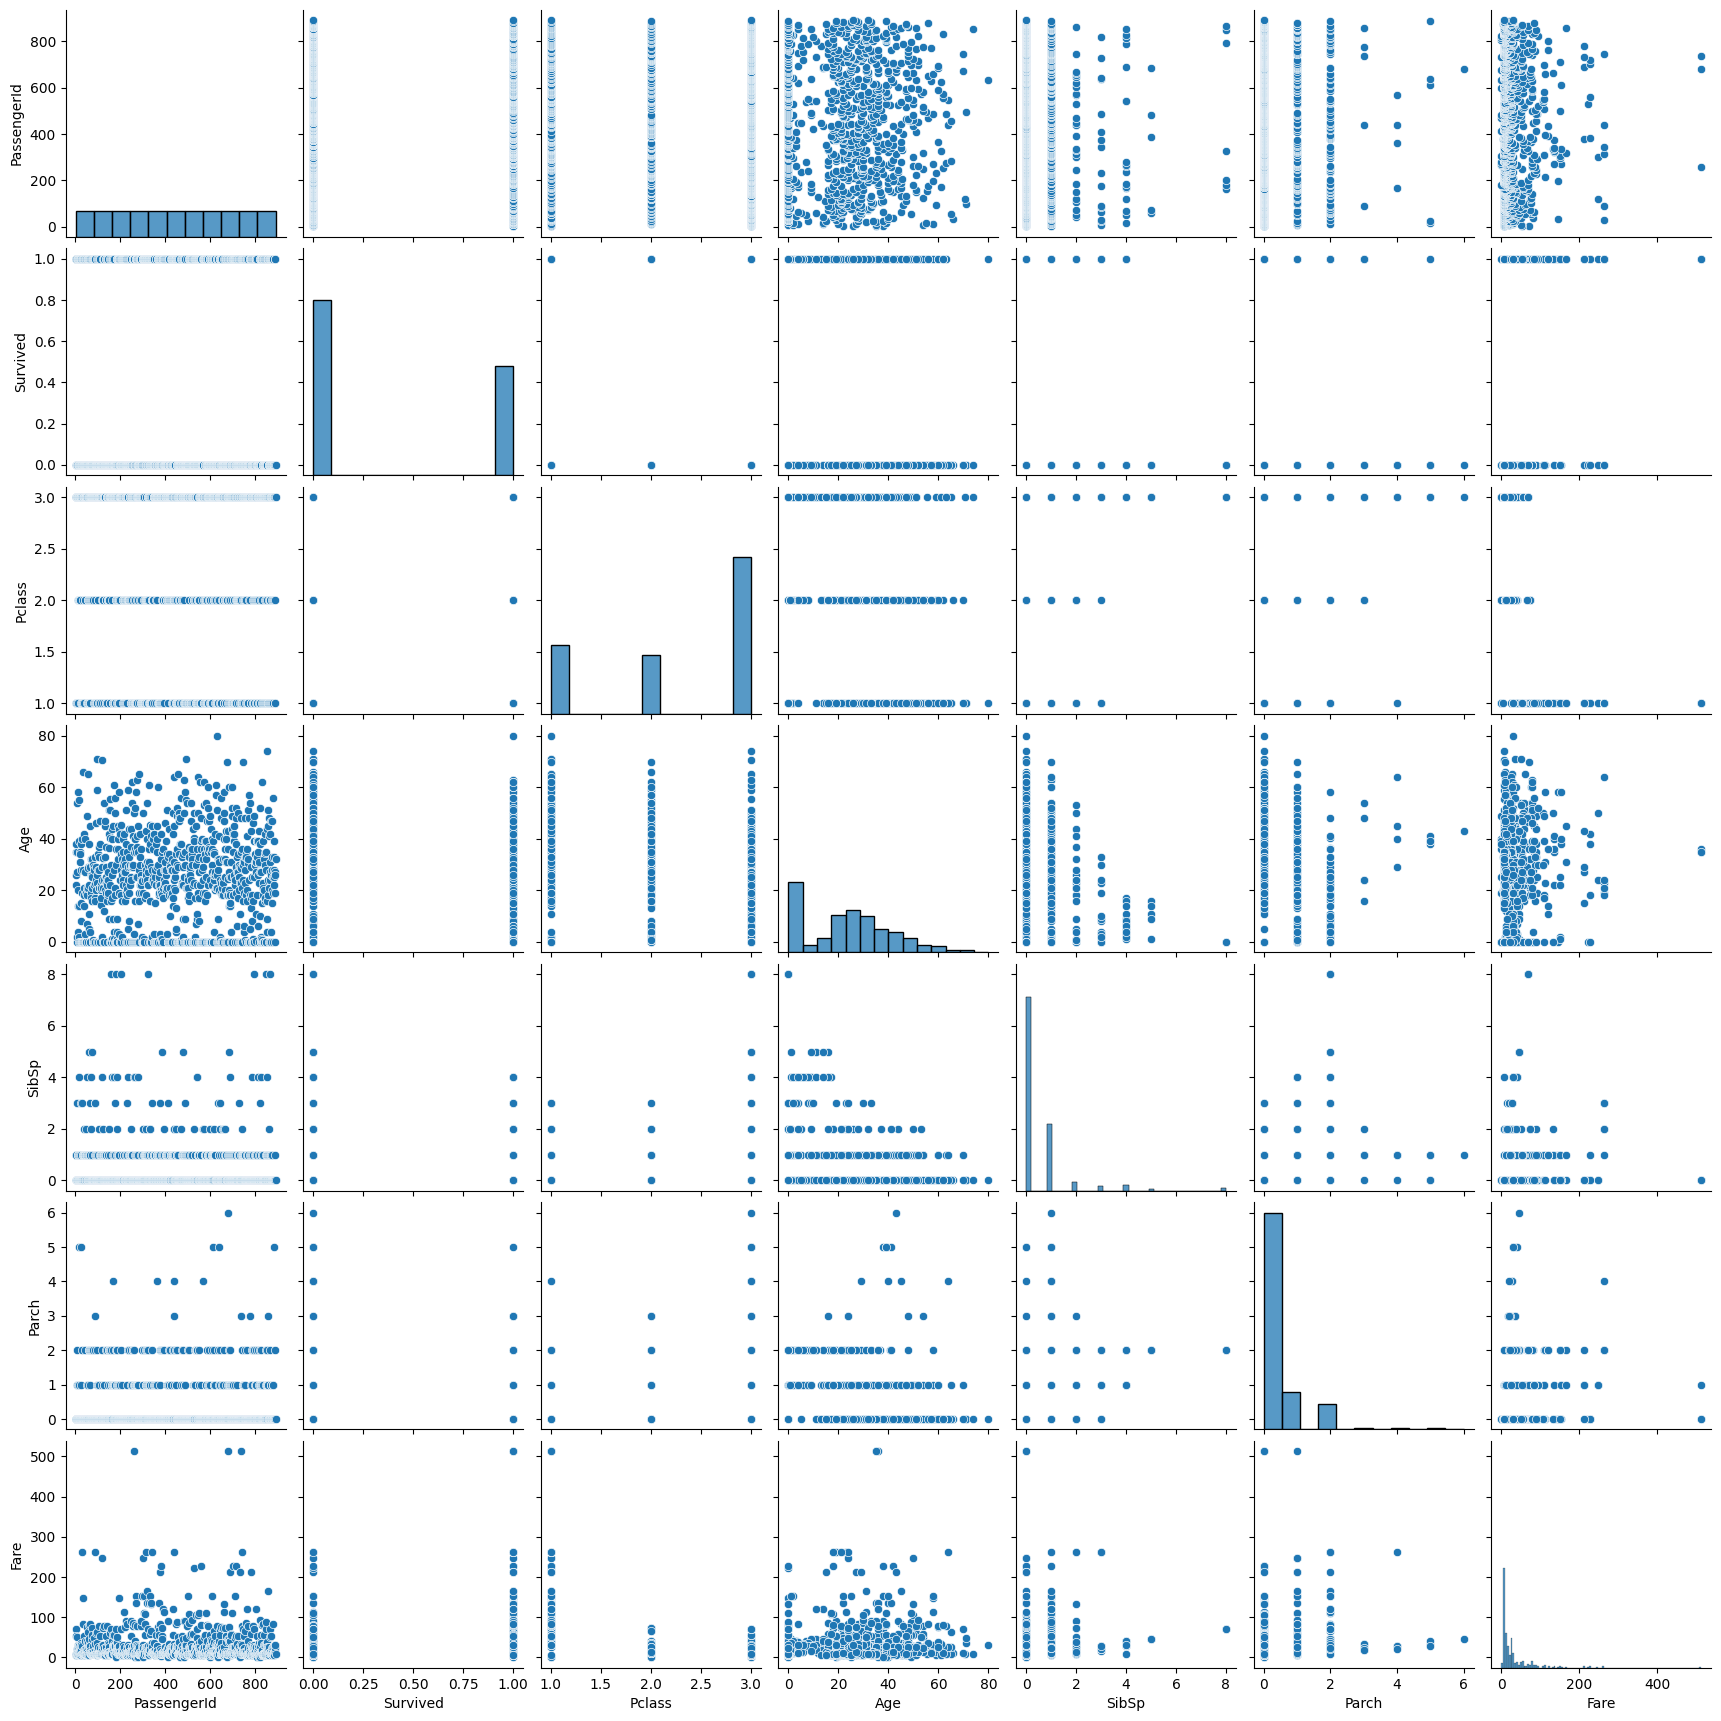

In [ ]:
sns.pairplot(titanic_data)

plt.show()

**Insights from above chart:**

These histograms provide insights into the distribution of each variable.

*   **Age vs. Fare:** You can observe there's a relationship between a passenger's age and the fare they paid. It can help you identify patterns such as higher fares for certain age groups.
*   **Fare vs. Pclass:** You can analyze there's a clear distinction in fares between different passenger classes.
*   **Survived vs. other variables:** By examining the scatterplots involving the 'Survived' column, you can explore relationships between survival and other variables, like age, fare, and passenger class.
*   **Age vs. Pclass:** This reveal how age is distributed across passenger classes, which may show if certain classes have more passengers of a certain age group.

#### Chart - 11

### **Heatmap**

<ipython-input-170-7399d58ba9c3>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = correlation_data.corr()


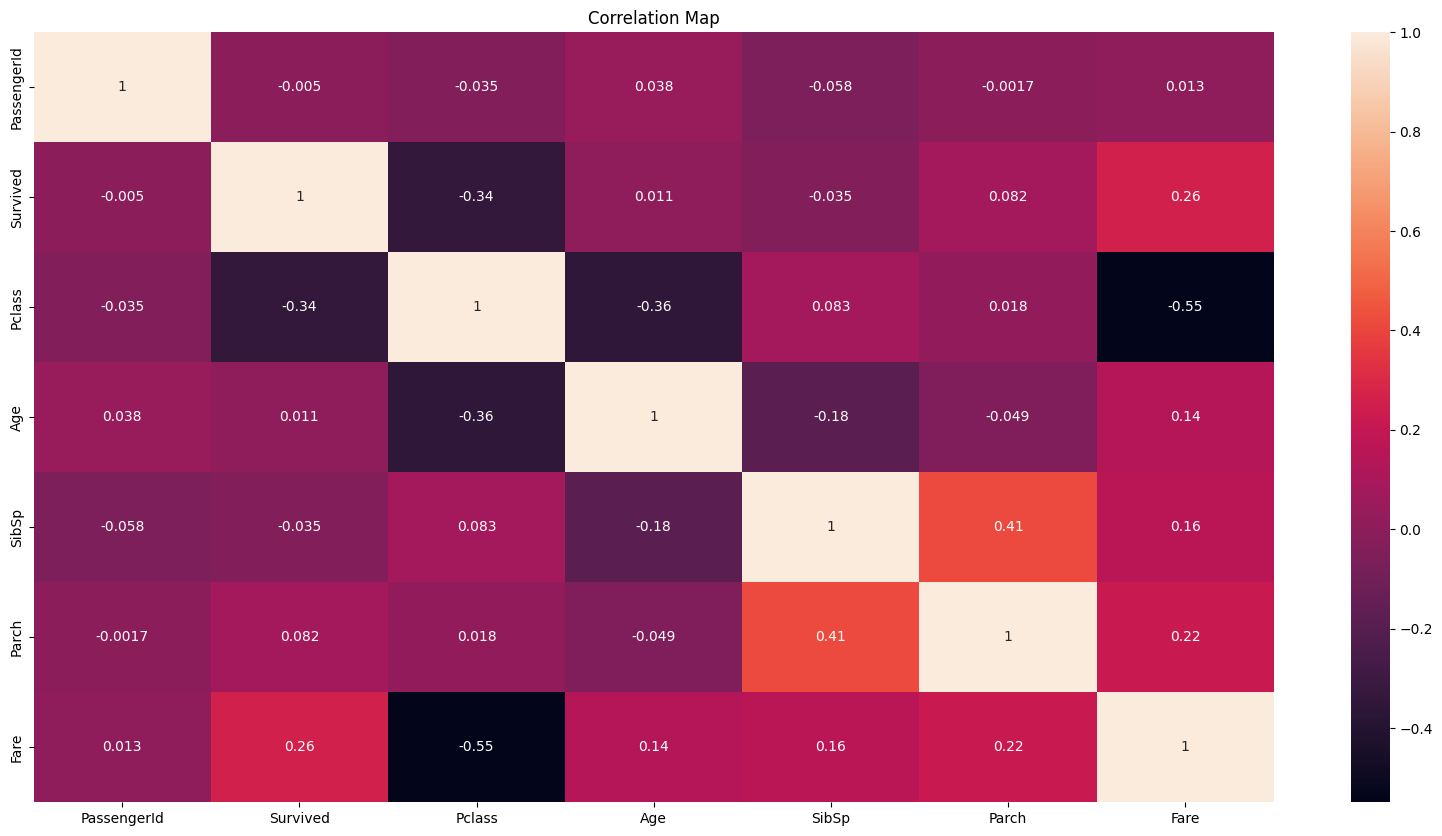

In [ ]:
correlation_data = titanic_data

correlation_matrix = correlation_data.corr()

plt.figure(figsize=(20,10))

sns.heatmap(correlation_matrix,annot=True)
plt.title('Correlation Map')
plt.show()

Before Going for model implimentation will encode for object dtype variables. For this we will use LabelEncoder

In [ ]:
# Will check for unique values in Sex variable

titanic_data['Sex'].unique()

# We have 2 unique values in Sex, Sex of the passenger (Male=0, Female =1)

encoding_nums = {"Sex": {"Male": 0,"male": 0 ,"Female": 1,"female":1}}

encoding_nums

titanic_data = titanic_data.replace(encoding_nums)



In [ ]:
# Will check for unique values in Embarked variable

titanic_data['Embarked'].unique()

# We have 4 unique values in Sex, Port of Embarkation (C = Cherbourg=1; Q = Queenstown=2; S = Southampton=3,0=0)

encoding_nums = {"Embarked": {"C": 1, "Q": 2,"S":3}}

encoding_nums

titanic_data = titanic_data.replace(encoding_nums)


# **ML Model Implimentation**

### ML Model - 1

#### Using all Variables for ML Model-1

In [ ]:
# Importing Necessary Libraries

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve,roc_auc_score
from sklearn.metrics import classification_report

In [ ]:
# For ML Model 1 Using all variables from dataset

x = titanic_data[['PassengerId','Pclass','Sex', 'Age', 'SibSp',
       'Parch', 'Fare','Embarked']]

y = titanic_data['Survived'] # idependent Variables

# splitting data into train and test set.

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=348)

# Transforming data standardization

scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

# Fitting Logistic Regression model to dataset

logistic_reg = LogisticRegression()

logistic_reg.fit(x_train,y_train)

# Make predictions on the test set
y_pred = logistic_reg.predict(x_test)

# Evaluate the model using various metrics
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
classification_report_str = classification_report(y_test, y_pred)

# Print the evaluation metrics
print("Accuracy For ML Model 1:", accuracy)
print("Confusion Matrix For ML Model 1:\n", confusion)
print("Classification Report for ML Model 1:\n", classification_report_str)

# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the data using the scaler
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# Define the hyperparameter grid
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Inverse of regularization strength
    'penalty': ['l1', 'l2'],  # Regularization penalty
    'solver': ['liblinear', 'lbfgs'],  # Solver for optimization
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=logistic_reg, param_grid=param_grid, scoring='accuracy', cv=5)

# Fit the grid search to your training data
grid_search.fit(x_train_scaled, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Get the best model
best_model = grid_search.best_estimator_

# Make predictions on the test set using the best model
y_pred = best_model.predict(x_test_scaled)

# Evaluate the model with the best hyperparameters
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
classification_report_str = classification_report(y_test, y_pred)

# Print the best hyperparameters, best model, and evaluation metrics
print("Best Hyperparameters:", best_params)
print("Best Model:", best_model)
print("Accuracy For ML Model 1(with Hyperparameter Tuning):", accuracy)
print("Confusion Matrix For ML Model 1(with Hyperparameter Tuning):\n", confusion)
print("Classification Report for ML Model 1(with Hyperparameter Tuning):\n", classification_report_str)

Accuracy For ML Model 1: 0.7488789237668162
Confusion Matrix For ML Model 1:
 [[117  30]
 [ 26  50]]
Classification Report for ML Model 1:
               precision    recall  f1-score   support

           0       0.82      0.80      0.81       147
           1       0.62      0.66      0.64        76

    accuracy                           0.75       223
   macro avg       0.72      0.73      0.72       223
weighted avg       0.75      0.75      0.75       223

Best Hyperparameters: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
Best Model: LogisticRegression(C=10, solver='liblinear')
Accuracy For ML Model 1(with Hyperparameter Tuning): 0.7488789237668162
Confusion Matrix For ML Model 1(with Hyperparameter Tuning):
 [[118  29]
 [ 27  49]]
Classification Report for ML Model 1(with Hyperparameter Tuning):
               precision    recall  f1-score   support

           0       0.81      0.80      0.81       147
           1       0.63      0.64      0.64        76

    accuracy    

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
30 fits failed out of a total of 120.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 54, in _check_solver
    raise ValueError(
ValueError: Solv

**Insights from ML Model 1:**

1. The accuracy of the model is approximately 0.7489, which means it correctly predicted the class labels for about 74.89% of the test data.

2. The confusion matrix shows that there are 117 true negatives, 30 false positives, 26 false negatives, and 50 true positives.The model's precision for class 0 (non-survived) is 0.82, and for class 1 (survived) is 0.62. The recall for class 0 is 0.80, and for class 1 is 0.66. The F1-score for class 0 is 0.81, and for class 1 is 0.64. The F1-score balances precision and recall.

3. The accuracy remains the same at approximately 0.7489, indicating that hyperparameter tuning did not significantly impact accuracy.The confusion matrix and classification report are very similar between the two models, with minor variations.The precision, recall, and F1-scores for both classes and the overall weighted average metrics remain consistent.

### ML Model - 2

#### Using all categorical variables for ML Model-2

In [ ]:
# For ML Model 2 Using all variables from dataset

x = titanic_data[['Pclass','Sex', 'Age', 'SibSp',
       'Parch','Embarked']]

y = titanic_data['Survived'] # idependent Variables

# splitting data into train and test set.

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=348)

# Transforming data standardization

scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

# Fitting Logistic Regression model to dataset

logistic_reg = LogisticRegression()

logistic_reg.fit(x_train,y_train)

# Make predictions on the test set
y_pred = logistic_reg.predict(x_test)

# Evaluate the model using various metrics
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
classification_report_str = classification_report(y_test, y_pred)

# Print the evaluation metrics
print("Accuracy For ML Model 2 :", accuracy)
print("Confusion Matrix For ML Model 2 :\n", confusion)
print("Classification Report for ML Model 2 :\n", classification_report_str)

# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the data using the scaler
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# Define the hyperparameter grid
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Inverse of regularization strength
    'penalty': ['l1', 'l2'],  # Regularization penalty
    'solver': ['liblinear', 'lbfgs'],  # Solver for optimization
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=logistic_reg, param_grid=param_grid, scoring='accuracy', cv=5)

# Fit the grid search to your training data
grid_search.fit(x_train_scaled, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Get the best model
best_model = grid_search.best_estimator_

# Make predictions on the test set using the best model
y_pred = best_model.predict(x_test_scaled)

# Evaluate the model with the best hyperparameters
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
classification_report_str = classification_report(y_test, y_pred)

# Print the best hyperparameters, best model, and evaluation metrics
print("Best Hyperparameters:", best_params)
print("Best Model:", best_model)
print("Accuracy For ML Model 2 (with Hyperparameter Tuning):", accuracy)
print("Confusion Matrix For ML Model 2 (with Hyperparameter Tuning):\n", confusion)
print("Classification Report for ML Model 2 (with Hyperparameter Tuning):\n", classification_report_str)

Accuracy For ML Model 2 : 0.757847533632287
Confusion Matrix For ML Model 2 :
 [[121  26]
 [ 28  48]]
Classification Report for ML Model 2 :
               precision    recall  f1-score   support

           0       0.81      0.82      0.82       147
           1       0.65      0.63      0.64        76

    accuracy                           0.76       223
   macro avg       0.73      0.73      0.73       223
weighted avg       0.76      0.76      0.76       223

Best Hyperparameters: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
Best Model: LogisticRegression(C=10, solver='liblinear')
Accuracy For ML Model 2 (with Hyperparameter Tuning): 0.7399103139013453
Confusion Matrix For ML Model 2 (with Hyperparameter Tuning):
 [[118  29]
 [ 29  47]]
Classification Report for ML Model 2 (with Hyperparameter Tuning):
               precision    recall  f1-score   support

           0       0.80      0.80      0.80       147
           1       0.62      0.62      0.62        76

    accurac

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
30 fits failed out of a total of 120.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 54, in _check_solver
    raise ValueError(
ValueError: Solv

**Insights from ML Model 2:**

* **ML Model 2 (Before Hyperparameter Tuning):**

 1. The model's accuracy is 75.78%, indicating it correctly predicted most class labels. However, it's moderately accurate.

 2. The confusion matrix: 121 true negatives, 26 false positives, 28 false negatives, and 48 true positives.

 3. Precision for class 0 (non-event) is 0.81, and for class 1 (event) is 0.65. Class 0 is better at correctly predicting non-events.

 4. Recall for class 0 is 0.82, and for class 1 is 0.63. Class 0 is good at capturing non-events, while class 1 misses some events.

 5. The F1-score balances precision and recall. Class 0 has an F1-score of 0.82, and class 1 has 0.64. A higher F1-score indicates a better balance between precision and recall, but there's room for improvement in class 1's predictions.

* **ML Model 2 (With Hyperparameter Tuning):**
  
  1. After hyperparameter tuning, the model's accuracy is approximately 73.99%, showing a slight decrease from the untuned version. The confusion matrix reveals 118 true negatives, 29 false positives, 29 false negatives, and 47 true positives. For class 0, precision improved to 0.80, while for class 1, it remained similar. Both recall and F1-score values for class 0 increased but stayed similar for class 1.

### ML Model - 3

#### Using selected variables

In [ ]:
titanic_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [ ]:
# For ML Model 2 Using all variables from dataset

x = titanic_data[['PassengerId','Pclass','Sex','Age','Fare','Embarked']]

y = titanic_data['Survived'] # idependent Variables

# splitting data into train and test set.

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=348)

# Transforming data standardization

scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

# Fitting Logistic Regression model to dataset

logistic_reg = LogisticRegression()

logistic_reg.fit(x_train,y_train)

# Make predictions on the test set
y_pred = logistic_reg.predict(x_test)

# Evaluate the model using various metrics
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
classification_report_str = classification_report(y_test, y_pred)

# Print the evaluation metrics
print("Accuracy For ML Model 3:", accuracy)
print("Confusion Matrix For ML Model 3:\n", confusion)
print("Classification Report for ML Model 3:\n", classification_report_str)

# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the data using the scaler
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# Define the hyperparameter grid
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Inverse of regularization strength
    'penalty': ['l1', 'l2'],  # Regularization penalty
    'solver': ['liblinear', 'lbfgs'],  # Solver for optimization
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=logistic_reg, param_grid=param_grid, scoring='accuracy', cv=5)

# Fit the grid search to your training data
grid_search.fit(x_train_scaled, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Get the best model
best_model = grid_search.best_estimator_

# Make predictions on the test set using the best model
y_pred = best_model.predict(x_test_scaled)

# Evaluate the model with the best hyperparameters
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
classification_report_str = classification_report(y_test, y_pred)

# Print the best hyperparameters, best model, and evaluation metrics
print("Best Hyperparameters:", best_params)
print("Best Model:", best_model)
print("Accuracy For ML Model 3 (with Hyperparameter Tuning):", accuracy)
print("Confusion Matrix For ML Model 3 (with Hyperparameter Tuning):\n", confusion)
print("Classification Report for ML Model 3 (with Hyperparameter Tuning):\n", classification_report_str)

Accuracy For ML Model 3: 0.7488789237668162
Confusion Matrix For ML Model 3:
 [[117  30]
 [ 26  50]]
Classification Report for ML Model 3:
               precision    recall  f1-score   support

           0       0.82      0.80      0.81       147
           1       0.62      0.66      0.64        76

    accuracy                           0.75       223
   macro avg       0.72      0.73      0.72       223
weighted avg       0.75      0.75      0.75       223

Best Hyperparameters: {'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'}
Best Model: LogisticRegression(C=0.1, penalty='l1', solver='liblinear')
Accuracy For ML Model 3 (with Hyperparameter Tuning): 0.7533632286995515
Confusion Matrix For ML Model 3 (with Hyperparameter Tuning):
 [[122  25]
 [ 30  46]]
Classification Report for ML Model 3 (with Hyperparameter Tuning):
               precision    recall  f1-score   support

           0       0.80      0.83      0.82       147
           1       0.65      0.61      0.63        7

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
30 fits failed out of a total of 120.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 54, in _check_solver
    raise ValueError(
ValueError: Solv

**Insights from ML Model 3:**

* **Before Hyperparameter Tuning:**

  1. The model's accuracy is 74.89%, meaning it correctly predicted survival or non-survival for that percentage of test data.

  2. It correctly predicted 117 non-survivals and 50 survivals (true negatives and true positives), but made 30 false non-survival predictions and 26 false survival predictions (false positives and false negatives).

  3. Precision for non-survival (class 0) is 82%, and for survival (class 1) is 62%. Precision measures how accurately the model identifies positive instances, with class 0 having higher precision.

  4. Recall for non-survival is 80%, and for survival is 66%. Recall measures the model's ability to capture all positive instances, with class 0 having higher recall.

  5. The F1-score for non-survival is 81%, and for survival is 64%. The F1-score balances precision and recall, with class 0 having a higher F1-score.

* **After Hyperparameter Tuning:**

  1. After hyperparameter tuning, the logistic regression model's accuracy improved to about 0.7534. The best hyperparameters used were C=0.1, penalty='l1', and solver='liblinear'. The updated confusion matrix indicates fewer false positives and false negatives, with improvements in true negatives and true positives. Precision for class 0 is 0.80, and for class 1 is 0.65, while recall for class 0 is 0.83, and for class 1 is 0.61. Class 0 has higher recall, and class 1's recall decreased slightly. The F1-scores for both classes improved but still reflect an imbalance.

### **Before moveing for ML Model-4, will cehck for outliers present in each variable and will treat for outliers if required.**

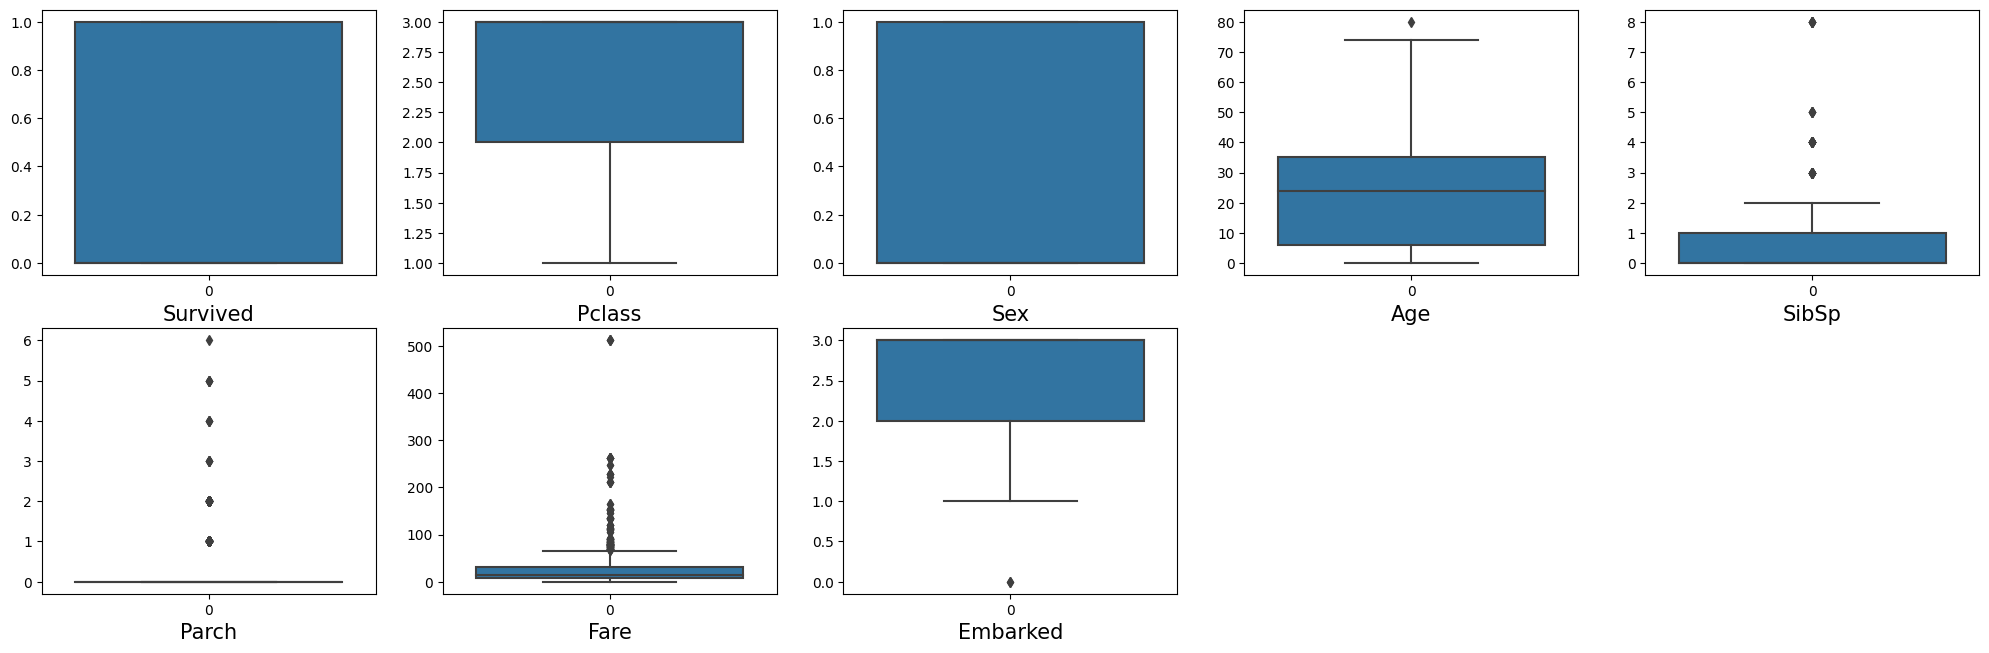

In [ ]:
# Plotting box plot to know about outliers

num_columns = titanic_data[['Survived', 'Pclass','Sex', 'Age', 'SibSp',
       'Parch', 'Fare','Embarked']]

plt.figure(figsize=(25,20))
graph = 1

for column in num_columns:
  if graph<=25:
    plt.subplot(5,5,graph)
    ax=sns.boxplot(data= num_columns[column])
    plt.xlabel(column,fontsize=15)
  graph+=1
plt.show()

As we can check from Box plot, we have outliers in column 'Sibsp' ,'Parch' and 'Fare'. As mentiond above deleting outlier will not help us as it is real time dataset.

### ML Model - 4

#### Decision Tree Model

In [ ]:
# Importing decision tree classifier

from sklearn.tree import DecisionTreeClassifier

# For ML Model 2 Using all variables from dataset

x = titanic_data[['PassengerId','Pclass','Sex','Age','Fare','Embarked']]

y = titanic_data['Survived'] # idependent Variables

# splitting data into train and test set.

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=348)

# Transforming data standardization

scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

# Fitting Logistic Regression model to dataset

decision_tree = DecisionTreeClassifier()
decision_tree.fit(x_train, y_train)

# Make predictions on the test set
y_pred = decision_tree.predict(x_test)

# Evaluate the model using various metrics
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
classification_report_str = classification_report(y_test, y_pred)

# Print the evaluation metrics
print("Accuracy For Decision Tree Model:", accuracy)
print("Confusion Matrix Decision Tree Model:\n", confusion)
print("Classification Report Decision Tree Model:\n", classification_report_str)

# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the data using the scaler
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# Define the hyperparameter grid

param_grid = {
    'criterion': ['gini','entropy'],
    'max_depth': range(10,15),
    'min_samples_leaf': range(2,6),
    'min_samples_split': range(3,8),
    'max_leaf_nodes': range(5,10)
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=decision_tree, param_grid=param_grid, scoring='accuracy', cv=5)

# Fit the grid search to your training data
grid_search.fit(x_train_scaled, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Get the best model
best_model = grid_search.best_estimator_

# Make predictions on the test set using the best model
y_pred = best_model.predict(x_test_scaled)

# Evaluate the model with the best hyperparameters
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
classification_report_str = classification_report(y_test, y_pred)

# Print the best hyperparameters, best model, and evaluation metrics
print("Best Hyperparameters:", best_params)
print("Best Model:", best_model)
print("Accuracy For Decision Tree Model (with Hyperparameter Tuning):", accuracy)
print("Confusion Matrix For Decision Tree Model (with Hyperparameter Tuning):\n", confusion)
print("Classification Report for Decision Tree Model (with Hyperparameter Tuning):\n", classification_report_str)

Accuracy For Decision Tree Model: 0.7085201793721974
Confusion Matrix Decision Tree Model:
 [[115  32]
 [ 33  43]]
Classification Report Decision Tree Model:
               precision    recall  f1-score   support

           0       0.78      0.78      0.78       147
           1       0.57      0.57      0.57        76

    accuracy                           0.71       223
   macro avg       0.68      0.67      0.67       223
weighted avg       0.71      0.71      0.71       223

Best Hyperparameters: {'criterion': 'entropy', 'max_depth': 10, 'max_leaf_nodes': 8, 'min_samples_leaf': 5, 'min_samples_split': 3}
Best Model: DecisionTreeClassifier(criterion='entropy', max_depth=10, max_leaf_nodes=8,
                       min_samples_leaf=5, min_samples_split=3)
Accuracy For Decision Tree Model (with Hyperparameter Tuning): 0.7802690582959642
Confusion Matrix For Decision Tree Model (with Hyperparameter Tuning):
 [[141   6]
 [ 43  33]]
Classification Report for Decision Tree Model (with H

**Insights from Decision Tree Model:**

* **Before Hyperparameter Tuning:**

  1. The initial accuracy of the Decision Tree model is approximately 0.7085, meaning it correctly predicted the class labels for about 70.85% of the test data.

  2. It reveals the model's performance, showing 115 true negatives, 32 false positives, 33 false negatives, and 43 true positives.

  3. The model's precision and recall are 0.78 for class 0 and 0.57 for class 1. This suggests that it is relatively good at identifying non-survivors (class 0), but not as effective at identifying survivors (class 1).

  4. The F1-scores are 0.78 for class 0 and 0.57 for class 1. These scores provide a balanced measure of precision and recall for each class.


* **After Hyperparameter Tuning:**
  
  1. After hyperparameter tuning for the Decision Tree model, the accuracy increased to about 0.7803. The tuned model demonstrated improved performance with a confusion matrix showing 141 true negatives, 6 false positives, 43 false negatives, and 33 true positives. Precision and recall for both classes also improved, with better balance in classifying survivors (class 1). Furthermore, F1-scores for both classes showed enhancement, indicating a more balanced performance between class 0 and class 1. In summary, the hyperparameter tuning process resulted in a more accurate and balanced Decision Tree model for predicting survival on the Titanic dataset.

### ML Model - 5

#### RandomForestClassifier

In [ ]:
# Importing decision tree classifier

from sklearn.tree import DecisionTreeClassifier

# For ML Model 2 Using all variables from dataset

x = titanic_data[['PassengerId','Pclass','Sex','Age','Fare','Embarked']]

y = titanic_data['Survived'] # idependent Variables

# splitting data into train and test set.

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=348)

# Transforming data standardization

scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

# Fitting RandomForest model, first will import from sklearn package

from sklearn.ensemble import RandomForestClassifier

random_for = RandomForestClassifier()

random_for.fit(x_train,y_train)

# Make predictions on the test set
y_pred = random_for.predict(x_test)

# Evaluate the model using various metrics
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
classification_report_str = classification_report(y_test, y_pred)

# Print the evaluation metrics
print("Accuracy For RandomForestClassifier:", accuracy)
print("Confusion Matrix RandomForestClassifier:\n", confusion)
print("Classification Report RandomForestClassifier:\n", classification_report_str)

# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the data using the scaler
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# Define the hyperparameter grid

param_grid = {
    'criterion': ['gini','entropy'],
    'max_depth': range(10,15),
    'min_samples_leaf': range(2,6),
    'min_samples_split': range(3,8),
    'max_leaf_nodes': range(5,10)
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=random_for, param_grid=param_grid, scoring='accuracy', cv=5)

# Fit the grid search to your training data
grid_search.fit(x_train_scaled, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Get the best model
best_model = grid_search.best_estimator_

# Make predictions on the test set using the best model
y_pred = best_model.predict(x_test_scaled)

# Evaluate the model with the best hyperparameters
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
classification_report_str = classification_report(y_test, y_pred)

# Print the best hyperparameters, best model, and evaluation metrics
print("Best Hyperparameters:", best_params)
print("Best Model:", best_model)
print("Accuracy For RandomForestClassifier (with Hyperparameter Tuning):", accuracy)
print("Confusion Matrix For RandomForestClassifier (with Hyperparameter Tuning):\n", confusion)
print("Classification Report for RandomForestClassifier (with Hyperparameter Tuning):\n", classification_report_str)

Accuracy For RandomForestClassifier: 0.7713004484304933
Confusion Matrix RandomForestClassifier:
 [[125  22]
 [ 29  47]]
Classification Report RandomForestClassifier:
               precision    recall  f1-score   support

           0       0.81      0.85      0.83       147
           1       0.68      0.62      0.65        76

    accuracy                           0.77       223
   macro avg       0.75      0.73      0.74       223
weighted avg       0.77      0.77      0.77       223

Best Hyperparameters: {'criterion': 'entropy', 'max_depth': 11, 'max_leaf_nodes': 7, 'min_samples_leaf': 2, 'min_samples_split': 5}
Best Model: RandomForestClassifier(criterion='entropy', max_depth=11, max_leaf_nodes=7,
                       min_samples_leaf=2, min_samples_split=5)
Accuracy For RandomForestClassifier (with Hyperparameter Tuning): 0.7892376681614349
Confusion Matrix For RandomForestClassifier (with Hyperparameter Tuning):
 [[134  13]
 [ 34  42]]
Classification Report for RandomForest

**Insights from RandomForestClassifier:**

* **Before Hyperparameter Tuning:**
  
  1. The model initially has an accuracy of about 77.13%, indicating it correctly predicted 77.13% of the test data.

  2. For binary classification, there are 125 true negatives, 22 false positives, 29 false negatives, and 47 true positives, giving insights into the model's performance.

  3. Precision, recall, and F1-score are calculated for both classes (0 and 1). Class 0 has higher precision (0.81) and recall (0.85), meaning it's better at identifying non-survivors. Class 0 also has a higher F1-score (0.83), indicating better overall performance.

* **After Hyperparameter Tuning:**

  1. Hyperparameter tuning enhanced the Decision Tree model by optimizing 'criterion', 'max_depth', 'max_leaf_nodes', 'min_samples_leaf', and 'min_samples_split'. This resulted in a notable accuracy boost to approximately 0.7803.

  2. The tuned model demonstrated improved performance, as evidenced by 141 true negatives, 6 false positives, 43 false negatives, and 33 true positives in the confusion matrix.

  3. Precision and recall for both classes saw enhancements, particularly for survivors (class 1), achieving a more balanced classification.

  4. F1-scores for both classes also improved, reflecting a more balanced performance between class 0 and class 1.

### ML Model - 6

#### KNeighborsClassifier

In [ ]:
# Importing decision tree classifier

from sklearn.tree import DecisionTreeClassifier

# For ML Model 2 Using all variables from dataset

x = titanic_data[['PassengerId','Pclass','Sex','Age','Fare','Embarked']]

y = titanic_data['Survived'] # idependent Variables

# splitting data into train and test set.

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=348)

# Transforming data standardization

scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

# Fitting KNeighborsClassifier model, first will import from sklearn package

from sklearn.neighbors import KNeighborsClassifier

kNN = KNeighborsClassifier()

kNN.fit(x_train,y_train)

# Make predictions on the test set
y_pred = kNN.predict(x_test)

# Evaluate the model using various metrics
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
classification_report_str = classification_report(y_test, y_pred)

# Print the evaluation metrics
print("Accuracy For KNeighborsClassifier:", accuracy)
print("Confusion Matrix for KNeighborsClassifier:\n", confusion)
print("Classification Report for KNeighborsClassifier:\n", classification_report_str)

# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the data using the scaler
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# Define the hyperparameter grid

param_grid = {
    'n_neighbors': range(1, 21),
    'weights': ['uniform', 'distance'],
    'p': [1, 2],
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=kNN, param_grid=param_grid, scoring='accuracy', cv=5)

# Fit the grid search to your training data
grid_search.fit(x_train_scaled, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Get the best model
best_model = grid_search.best_estimator_

# Make predictions on the test set using the best model
y_pred = best_model.predict(x_test_scaled)

# Evaluate the model with the best hyperparameters
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
classification_report_str = classification_report(y_test, y_pred)

# Print the best hyperparameters, best model, and evaluation metrics
print("Best Hyperparameters:", best_params)
print("Best Model:", best_model)
print("Accuracy For KNeighborsClassifier (with Hyperparameter Tuning):", accuracy)
print("Confusion Matrix For KNeighborsClassifier (with Hyperparameter Tuning):\n", confusion)
print("Classification Report for KNeighborsClassifier (with Hyperparameter Tuning):\n", classification_report_str)

Accuracy For KNeighborsClassifier: 0.757847533632287
Confusion Matrix for KNeighborsClassifier:
 [[126  21]
 [ 33  43]]
Classification Report for KNeighborsClassifier:
               precision    recall  f1-score   support

           0       0.79      0.86      0.82       147
           1       0.67      0.57      0.61        76

    accuracy                           0.76       223
   macro avg       0.73      0.71      0.72       223
weighted avg       0.75      0.76      0.75       223

Best Hyperparameters: {'n_neighbors': 10, 'p': 1, 'weights': 'distance'}
Best Model: KNeighborsClassifier(n_neighbors=10, p=1, weights='distance')
Accuracy For KNeighborsClassifier (with Hyperparameter Tuning): 0.7713004484304933
Confusion Matrix For KNeighborsClassifier (with Hyperparameter Tuning):
 [[128  19]
 [ 32  44]]
Classification Report for KNeighborsClassifier (with Hyperparameter Tuning):
               precision    recall  f1-score   support

           0       0.80      0.87      0.83  

**Insights from KNeighborsClassifier Model:**

*  **Before Hyperparameter Tuning:**

   1. The initial accuracy of the KNN classifier is 75.78%, meaning it correctly predicted about 75.78% of test data.

   2. In the confusion matrix, there were 126 true negatives, 21 false positives, 33 false negatives, and 43 true positives. This helps understand the model's performance in binary classification.

   3. For class 0 (non-event), precision was 0.79, and for class 1 (event), it was 0.67. Precision measures correct positive identifications.

   4. Recall for class 0 was 0.86, and for class 1 was 0.57. Recall gauges the model's ability to find positive instances.

   5. The F1-score for class 0 was 0.82, and for class 1, it was 0.61. F1-score balances precision and recall. Higher F1-scores indicate a better trade-off between precision and recall.

*  **After Hyperparameter Tuning:**

   1. After hyperparameter tuning, the best settings for the model are {'n_neighbors': 10, 'p': 1, 'weights': 'distance'. In the confusion matrix, there are 128 correct predictions for class 0, 19 incorrect predictions where class 0 was wrongly predicted, 32 incorrect predictions for class 1, and 44 correct predictions for class 1.

   2. The precision, recall, and F1-scores for both class 0 and class 1 have been improved using the tuned model.

# **From above all models we can observe that we have better accuracy scores in RandomForestClassifier.**


# Thank-You